<a href="https://colab.research.google.com/github/Fidelisaboke/ml-crash-course/blob/main/deep_learning/lstm_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM for Sentiment Analysis using IMDb Dataset

## Import Required Libraries

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Build CNN

In [4]:
model = Sequential([
    Embedding(10000, 32),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 86ms/step - accuracy: 0.7061 - loss: 0.5310 - val_accuracy: 0.8489 - val_loss: 0.3413
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8951 - loss: 0.2632 - val_accuracy: 0.8346 - val_loss: 0.3805
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 79ms/step - accuracy: 0.9259 - loss: 0.1984 - val_accuracy: 0.8387 - val_loss: 0.4143
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 74ms/step - accuracy: 0.9449 - loss: 0.1474 - val_accuracy: 0.8231 - val_loss: 0.5534
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.9628 - loss: 0.1074 - val_accuracy: 0.8317 - val_loss: 0.5535


782/782 - 11s - 14ms/step - accuracy: 0.8317 - loss: 0.5535


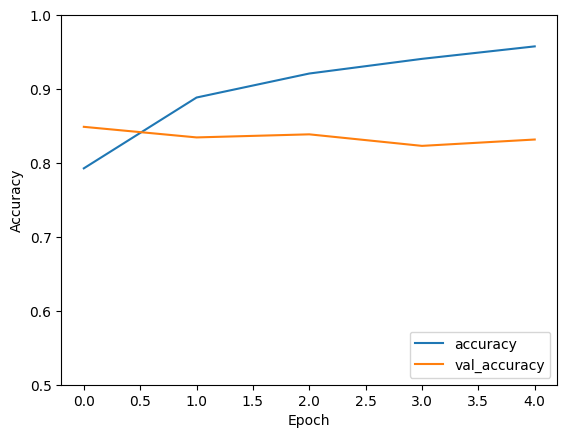

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [6]:
print(test_acc)

0.8317199945449829
